In [10]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import seq2seq_model
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Bidirectional, Add
from tensorflow import keras
import tensorflow as tf



In [2]:
df = pd.read_csv('2249345v4423910.csv', index_col=0)
df

,ltp odds,r1 spread,r1 pup,r2 spread,r2 pup,enhanced_markov,markov_odds,r1_0,r1_1,r1_2,r1_3,r2_0,r2_1,r2_2,r2_3
2018-07-07 10:36:10,0.424641,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:15,0.424423,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:20,0.424206,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:25,0.423989,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-07 10:36:30,0.423772,0.093909,0.409607,0.019749,0.484152,0.883068,0.423074,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-07 13:42:02,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:05,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:07,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-07 13:42:10,1.000000,0.008965,0.737546,0.594928,0.384681,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
data = df.to_numpy()
data

array([[0.4246405 , 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       [0.42442341, 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       [0.42420631, 0.09390895, 0.40960749, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.00896503, 0.73754648, ..., 0.        , 1.        ,
        0.        ]])

In [4]:
train_temp, test = train_test_split(data, test_size=0.8, shuffle=False)
train, val = train_test_split(train_temp, test_size=0.2, shuffle=False)
# train_x, train_y = seq2seq_model.truncate_data(data, 60 * 3, 60)
# train = data[: 60 * 8, :]
# test = data[60 * 8 :, :]
print(test.shape, train.shape)
# print(train_x[2,:,0])
# print(train_y[2,:,0])

(1845, 15) (368, 15)


In [5]:
model = load_model("transfer_lstm_model")
model.summary()

2023-05-09 20:51:00.634227: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-09 20:51:01.155690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_reversev2_grad_reversev2_reversev2_axis' with dtype int32 and shape [1]
	 [[{{node gradients_reversev2_grad_reversev2_reversev2_axis}}]]
2023-05-09 20:51:01.157342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 1)]      0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 75, 200)      323200      ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 75, 200)     641600      ['bidirectional[0][0]']          
 )                                                                                                
                                                                                                  
 bidirectional_12 (Bidirectiona  (None, 1)           1616        ['bidirectional[0][0]']    

2023-05-09 20:51:10.008900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-09 20:51:10.010473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-09 20:51:10.011409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Trainable params: 968,032
Non-trainable params: 0
__________________________________________________________________________________________________


In [6]:
# score, scores, actual, predicted = seq2seq_model.evaluate_model(model, train, test, 3, 36, features_out=range(1), features=range(1), features_in_num=1, features_out_num=1, initial_epochs=30, epochs=2, batches_to_train=100000)
window = 75
val_x, val_y = seq2seq_model.truncate_single_step(train, window, features_in=range(1), features_out=range(1))
results = model.evaluate(val_x, val_y)
preds = model.predict(val_x)

2023-05-09 20:51:10.641435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-09 20:51:10.643242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-09 20:51:10.644251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 3s 79ms/step - loss: 0.0636 - mae: 0.2501 - mse: 0.0635


2023-05-09 20:51:13.259432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-09 20:51:13.260785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-09 20:51:13.261899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 2s 76ms/step


RMSE:  0.2521140892928559
MAE:  0.25013595819473267


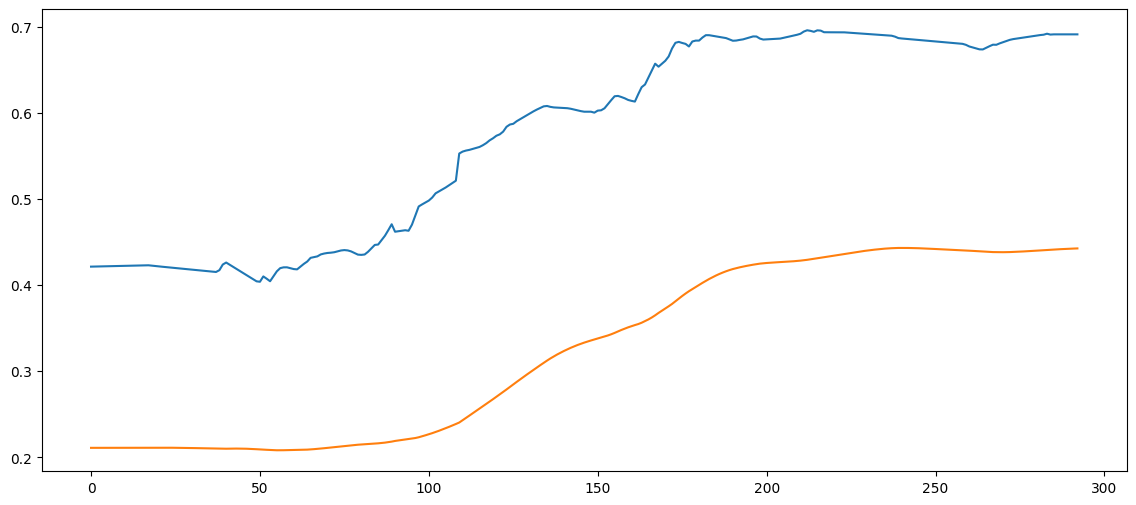

In [7]:
plt.figure(figsize=(14,6))
plt.plot(val_y[:,0])
plt.plot(preds[:,0])
print('RMSE: ', np.sqrt(results[0]))
print('MAE: ', results[1])

In [11]:
train_x, train_y = seq2seq_model.truncate_single_step(data, n_steps=75, features_in=range(1), features_out=range(1))
val_x, val_y = seq2seq_model.truncate_single_step(val, 75, features_in=range(1), features_out=range(1))
features_out_num = 1
print(val_x.shape, val_y.shape)
print(val.shape)
print(train_x.shape, train_y.shape)
# x = model.get_layer('lstm_1').output
# x = Dense(50, activation='elu')(x)
# x = Dense(1, activation='sigmoid')(x)
# model = keras.models.Model(inputs=model.input, outputs=x)

x = model.get_layer('bidirectional').output
y = model.get_layer('bidirectional_1').output
bd_out_1 = Bidirectional(LSTM(features_out_num, activation='linear'), merge_mode='sum')(x)
bd_out_2 = Bidirectional(LSTM(features_out_num, activation='tanh'), merge_mode='sum')(y)
model_out = Add()([bd_out_1, bd_out_2])
model = keras.models.Model(inputs=model.input, outputs=model_out)

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt, metrics=['mae'])
# print(model.get_layer('lstm').get_weights())
history = model.fit(train_x, train_y, epochs=10, batch_size=25, verbose=1)

(18, 75, 1) (18, 1)
(93, 15)
(2231, 75, 1) (2231, 1)


2023-05-09 20:52:31.580988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-09 20:52:31.582485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-09 20:52:31.583444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-05-09 20:52:32.021839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-09 20:52:32.023619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-09 20:52:32.024658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

90/90 [==============================] - 23s 164ms/step - loss: 0.0121 - mae: 0.0732
Epoch 2/10
90/90 [==============================] - 15s 161ms/step - loss: 0.0027 - mae: 0.0365
Epoch 3/10
90/90 [==============================] - 14s 153ms/step - loss: 0.0024 - mae: 0.0348
Epoch 4/10
90/90 [==============================] - 14s 156ms/step - loss: 0.0018 - mae: 0.0306
Epoch 5/10
90/90 [==============================] - 14s 155ms/step - loss: 0.0016 - mae: 0.0285
Epoch 6/10
90/90 [==============================] - 14s 157ms/step - loss: 0.0016 - mae: 0.0288
Epoch 7/10
90/90 [==============================] - 14s 159ms/step - loss: 0.0015 - mae: 0.0289
Epoch 8/10
90/90 [==============================] - 14s 159ms/step - loss: 0.0017 - mae: 0.0303
Epoch 9/10
90/90 [==============================] - 14s 158ms/step - loss: 0.0014 - mae: 0.0276
Epoch 10/10
90/90 [==============================] - 14s 159ms/step - loss: 0.0016 - mae: 0.0293


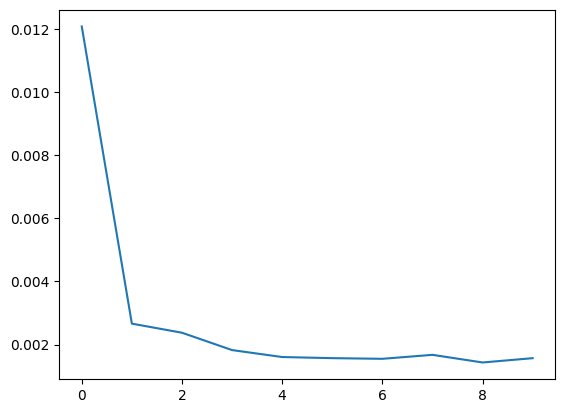

In [12]:
plt.plot(history.history['loss'])

In [13]:
test_x, test_y = seq2seq_model.truncate_single_step(test, 75, features_in=range(1), features_out=range(1))
results = model.evaluate(test_x, test_y)
preds = model.predict(test_x)

2023-05-09 20:55:43.398852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-09 20:55:43.400560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-09 20:55:43.401612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

56/56 [==============================] - 6s 78ms/step - loss: 0.3278 - mae: 0.5433


2023-05-09 20:55:49.503882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-09 20:55:49.505530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-09 20:55:49.506501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

56/56 [==============================] - 7s 78ms/step


RMSE:  0.5725684032221232
MAE:  0.5432791709899902


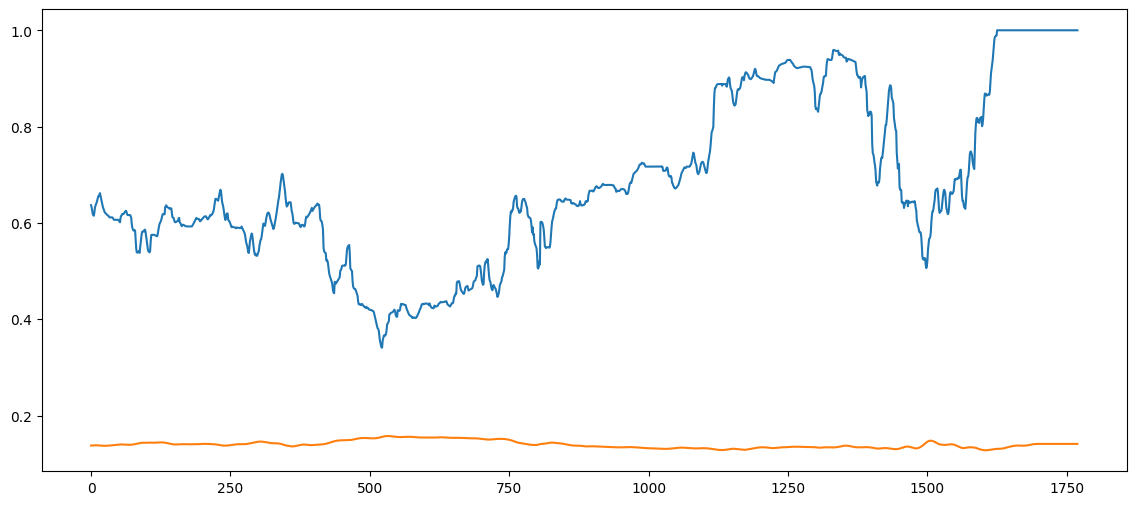

In [14]:
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
plt.plot(preds[:,0])
print('RMSE: ', np.sqrt(results[0]))
print('MAE: ', results[1])

In [15]:
train, test = train_test_split(data, test_size=0.7, shuffle=False)
test_x, test_y = seq2seq_model.truncate_single_step(test, window, features_in=range(1), features_out=range(1))
forecasts = []
i = 0
forecast_window = 36
while i * forecast_window < test_x.shape[0]:
    pred_x_temp = test_x[forecast_window * i, :, :]
    pred_y_temp = test_y[forecast_window * i, :]
    pred_x = pred_x_temp.reshape((1, window, pred_x_temp.shape[1]))
    y_future = []
    for k in range(forecast_window):
        pred_y = model.predict(pred_x)
        y_future.append(pred_y)
        pred_x = np.append(pred_x[:, 1:, :], pred_y.reshape(1, 1, 1), axis=1)
    forecasts.append(y_future)
    pred_x_temp = pred_x_temp.reshape((1, window, test_x.shape[2]))
    pred_y_temp = pred_y_temp.reshape((1, 1))
    train_x = np.vstack((train_x, pred_x_temp))
    train_y = np.vstack((train_y, pred_y_temp))
    i += 1
    if i % 5 == 0:
        model.reset_states()
        model.fit(train_x, train_y, epochs=5, batch_size=25, verbose=1)
        



1/1 [==============================] - 0s 80ms/step
Epoch 1/5
90/90 [==============================] - 14s 155ms/step - loss: 0.0013 - mae: 0.0268
Epoch 2/5
90/90 [==============================] - 14s 156ms/step - loss: 0.0014 - mae: 0.0273
Epoch 3/5
90/90 [==============================] - 14s 156ms/step - loss: 0.0013 - mae: 0.0257
Epoch 4/5
90/90 [==============================] - 14s 157ms/step - loss: 0.0013 - mae: 0.0267
Epoch 5/5
1/1 [==============================] - 0s 83ms/step
Epoch 1/5
90/90 [==============================] - 15s 161ms/step - loss: 0.0012 - mae: 0.0252
Epoch 2/5
90/90 [==============================] - 15s 163ms/step - loss: 0.0011 - mae: 0.0243
Epoch 3/5
90/90 [==============================] - 14s 160ms/step - loss: 0.0012 - mae: 0.0245
Epoch 4/5
90/90 [==============================] - 14s 161ms/step - loss: 0.0011 - mae: 0.0240
Epoch 5/5
1/1 [==============================] - 0s 80ms/step
Epoch 1/5
90/90 [==============================] - 14s 156ms/ste

RMSE:  0.3278345763683319
MAE:  0.5432791709899902
(43, 36, 1, 1)
(1548,)


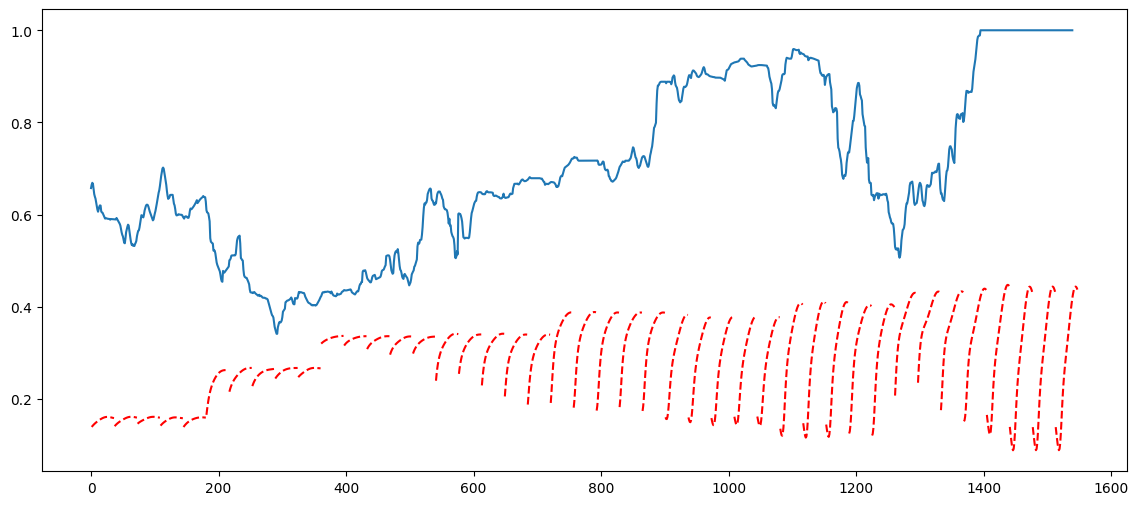

In [16]:
print('RMSE: ', results[0])
print('MAE: ', results[1])
forecasts_arr = np.array(forecasts)
forecasts_flat = forecasts_arr[:, :, 0, 0].flatten()
print(forecasts_arr.shape)
print(forecasts_flat.shape)
df_preds = pd.DataFrame({'Predictions': forecasts_flat}).shift(1)
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
i = 0
idx = 0

while idx + forecast_window <= test_x.shape[0]:
     idx = forecast_window * i + 1
     s_pred = df_preds.iloc[idx:idx + forecast_window]
     plt.plot(s_pred, '--', color='red')
     i += 1

In [ ]:
pred_length = test_y.shape[0]
print(df_preds['Predictions'].iloc[:pred_length:36])
df_scores = pd.DataFrame({'Forecasts': df_preds['Predictions'].iloc[:pred_length:36], 'Actual': test_y[1::36,0]})
df_scores['absolute error'] = abs(df_scores['Actual'] - df_scores['Forecasts'])
df_scores['squared error'] = df_scores['absolute error']**(2)
print('Mean absolute error of last forecast observation: ', df_scores['absolute error'].mean())
print('Mean squared error of last forecast observation: ', df_scores['squared error'].mean())
print('Root mean squared error of last forecast observation: ', np.sqrt(df_scores['squared error'].mean()))
plt.plot(df_scores['squared error'])

In [ ]:
# print('RMSE: ', score)
# actual_odds = actual.reshape((actual.shape[0]*actual.shape[1]))
# predicted_odds = predicted.reshape((predicted.shape[0]*predicted.shape[1]))
# df_pred = pd.DataFrame({'pred':predicted_odds})
# plt.figure(figsize=(14,6))
# plt.plot(actual_odds)
# for i in range(predicted.shape[0]):
#     idx = 60 * i
#     s_pred = df_pred.iloc[idx:idx + 60]
#     plt.plot(s_pred, '--', color='red')

In [ ]:
# plt.figure(figsize=(14,6))
# plt.plot(scores, '-o')